In [ ]:
!pip install opendatasets -q

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/mdismielhossenabir/skin-cancer-or-not-skin-cancer-image-datasets")
#nethmisarandi
#d0e64c7acad746d87d71f87a47044b21

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nethmisarandi
Your Kaggle Key: ··········


100%|██████████| 3.21M/3.21M [00:00<00:00, 51.4MB/s]

In [ ]:
batch_size=32
image_size=(128,128)   #input image size

In [ ]:
train_data_dir="/content/skin-cancer-or-not-skin-cancer-image-datasets/train/train"
test_data_dir="/content/skin-cancer-or-not-skin-cancer-image-datasets/test/test"

In [ ]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=batch_size,image_size=image_size,subset="training",
                                                       validation_split=0.1,seed=42)

Found 210 files belonging to 2 classes.
Using 189 files for training.


In [ ]:
validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=batch_size,image_size=image_size,subset="validation",
                                                       validation_split=0.1,seed=42)

Found 210 files belonging to 2 classes.
Using 21 files for validation.


In [ ]:
test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,batch_size=batch_size,image_size=image_size)

Found 11 files belonging to 2 classes.


In [ ]:
class_names=train_data.class_names
class_names

['not_skin_cancer', 'skin_cancer']

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


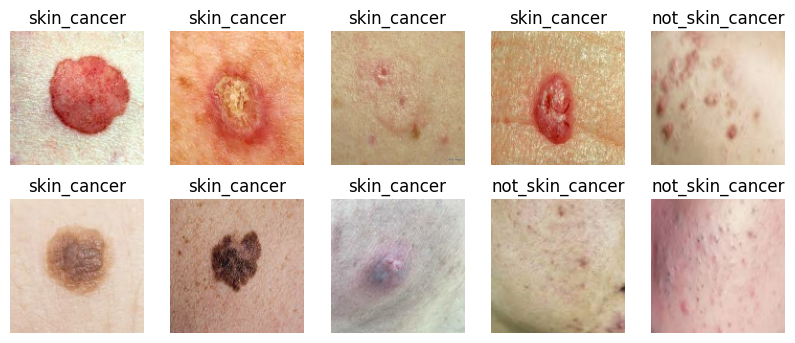

In [ ]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[234.       193.       179.      ]
   [234.89453  195.6836   180.78906 ]
   [234.17578  196.82422  182.64844 ]
   ...
   [196.       155.82422  148.      ]
   [195.78906  154.78906  147.78906 ]
   [194.       153.       146.      ]]

  [[232.9375   191.9375   176.875   ]
   [233.35681  193.67065  178.18884 ]
   [233.45776  194.69922  179.55432 ]
   ...
   [199.40955  158.26465  148.7533  ]
   [195.14575  153.6145   144.54553 ]
   [192.40625  150.875    142.28125 ]]

  [[231.34375  190.34375  174.125   ]
   [231.34375  191.0426   174.82385 ]
   [231.98767  191.94922  175.55017 ]
   ...
   [201.42761  158.77136  147.15356 ]
   [193.13916  150.50598  139.1278  ]
   [190.34375  147.90625  137.03125 ]]

  ...

  [[214.5625   151.5625   120.5625  ]
   [212.96912  149.96912  118.96912 ]
   [210.48889  147.48889  116.48889 ]
   ...
   [187.08984  139.91406  125.08984 ]
   [189.3153   141.3977   127.31531 ]
   [187.21875  140.       125.21875 ]]

  [[214.53125  152.       121.4687

In [ ]:
#feature scaling
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.6668658  0.54137564 0.5335325 ]
   [0.66939336 0.5456955  0.53665745]
   [0.659758   0.5460325  0.5293505 ]
   ...
   [0.45951286 0.40261948 0.40261948]
   [0.3920037  0.33377758 0.32712927]
   [0.38019302 0.3213695  0.30980393]]

  [[0.6691487  0.5366877  0.53112745]
   [0.66939336 0.54255766 0.5338861 ]
   [0.6585367  0.5388174  0.5239298 ]
   ...
   [0.44168186 0.38360476 0.37822163]
   [0.39947242 0.34087992 0.33109382]
   [0.4151692  0.35862857 0.34694088]]

  [[0.6719114  0.53219604 0.52814615]
   [0.6689687  0.53639704 0.52913815]
   [0.6549786  0.52973187 0.5159757 ]
   ...
   [0.42736152 0.36470994 0.3566185 ]
   [0.41139156 0.34956768 0.33919695]
   [0.45359826 0.39438596 0.38136885]]

  ...

  [[0.4342636  0.35429662 0.3425932 ]
   [0.4463103  0.36369693 0.3482711 ]
   [0.44902846 0.3654194  0.35098925]
   ...
   [0.5955601  0.43820387 0.45693856]
   [0.6285734  0.48090187 0.5008182 ]
   [0.6609359  0.5315167  0.54899895]]

  [[0.43956885 0.36113748 0.343812

In [ ]:
data_augmentation=tf.keras.Sequential(
    [tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
     tf.keras.layers.RandomRotation(0.2),
     tf.keras.layers.RandomZoom(0.2),]
)

In [ ]:
#model building
model=tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))

model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryFocalCrossentropy(),
              metrics=["accuracy"])

In [ ]:

history=model.fit(train_data,epochs=20,
                   validation_data=validation_data)

Epoch 1/20
6/6 [==============================] - 9s 1s/step - loss: 0.1962 - accuracy: 0.6032 - val_loss: 0.2183 - val_accuracy: 0.3810
Epoch 2/20
6/6 [==============================] - 6s 943ms/step - loss: 0.1249 - accuracy: 0.8042 - val_loss: 1.1677 - val_accuracy: 0.3810
Epoch 3/20
6/6 [==============================] - 7s 1s/step - loss: 0.1419 - accuracy: 0.7778 - val_loss: 0.2906 - val_accuracy: 0.3810
Epoch 4/20
6/6 [==============================] - 7s 1s/step - loss: 0.1324 - accuracy: 0.8201 - val_loss: 0.7157 - val_accuracy: 0.3810
Epoch 5/20
6/6 [==============================] - 6s 993ms/step - loss: 0.1055 - accuracy: 0.7937 - val_loss: 0.3486 - val_accuracy: 0.3810
Epoch 6/20
6/6 [==============================] - 6s 953ms/step - loss: 0.0938 - accuracy: 0.8254 - val_loss: 0.2274 - val_accuracy: 0.3810
Epoch 7/20
6/6 [==============================] - 6s 934ms/step - loss: 0.0995 - accuracy: 0.8466 - val_loss: 0.2774 - val_accuracy: 0.3810
Epoch 8/20
6/6 [=============

In [ ]:
history.history

{'loss': [0.19621862471103668,
  0.1248614564538002,
  0.14188280701637268,
  0.13239909708499908,
  0.10546344518661499,
  0.09376315027475357,
  0.09950385242700577,
  0.09617920219898224,
  0.09096748381853104,
  0.06732717901468277,
  0.0653703585267067,
  0.06614755839109421,
  0.07033111900091171,
  0.07468286156654358,
  0.07775400578975677,
  0.04679488018155098,
  0.05716802552342415,
  0.04765692725777626,
  0.04320157319307327,
  0.05156739056110382],
 'accuracy': [0.60317462682724,
  0.8042327761650085,
  0.7777777910232544,
  0.820105791091919,
  0.7936508059501648,
  0.8253968358039856,
  0.8465608358383179,
  0.8306878209114075,
  0.8624338507652283,
  0.8624338507652283,
  0.8783068656921387,
  0.8677248954772949,
  0.8730158805847168,
  0.8359788656234741,
  0.8571428656578064,
  0.9100528955459595,
  0.8730158805847168,
  0.9100528955459595,
  0.9153439402580261,
  0.8994709253311157],
 'val_loss': [0.21833349764347076,
  1.167697548866272,
  0.29060524702072144,
  0.

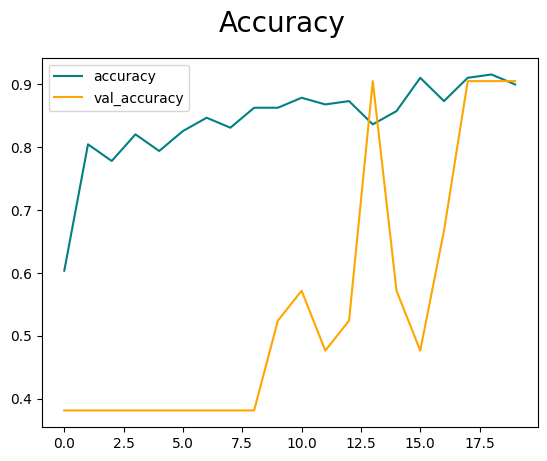

In [ ]:
fig=plt.figure()
plt.plot(history.history["accuracy"],color="teal",label="accuracy")
plt.plot(history.history["val_accuracy"],color="orange",label="val_accuracy")
fig.suptitle("Accuracy",fontsize=20)
plt.legend()
plt.show()

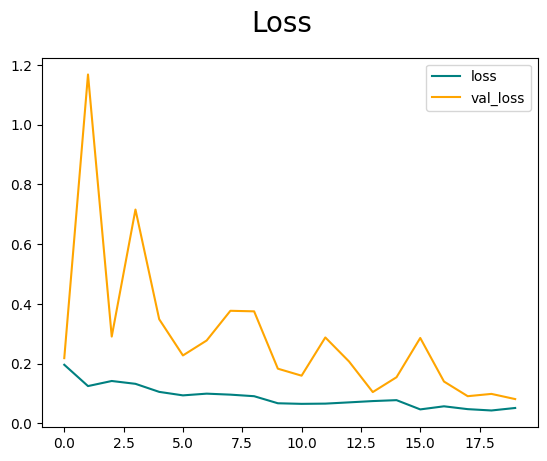

In [ ]:
fig=plt.figure()
plt.plot(history.history["loss"],color="teal",label="loss")
plt.plot(history.history["val_loss"],color="orange",label="val_loss")
fig.suptitle("Loss",fontsize=20)
plt.legend()
plt.show()

In [ ]:
#evaluate the model
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  x,y =batch
  yhat=model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 446ms/step


In [ ]:
precision.result()
recall.result()
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.90909094>

In [ ]:
import cv2

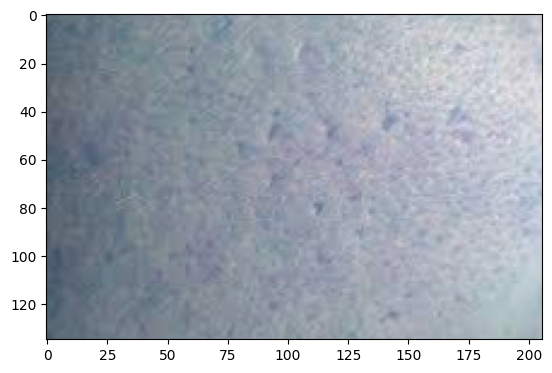

In [ ]:
image=cv2.imread("/content/skin-cancer-or-not-skin-cancer-image-datasets/test/test/not_skin_cancer/not_skin_cancer_02.jpg")
plt.imshow(image)
plt.show()

In [ ]:
resized_image=tf.image.resize(image,image_size)
scaled_image=resized_image/225

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.40225926, 0.4688414 , 0.5044815 ],
        [0.3880382 , 0.45470485, 0.49026042],
        [0.3830961 , 0.4497628 , 0.48737848],
        ...,
        [0.85939807, 0.8686168 , 0.9085532 ],
        [0.91122913, 0.9067951 , 0.9512291 ],
        [0.8964433 , 0.89203584, 0.933353  ]],

       [[0.42086807, 0.48444444, 0.52381945],
        [0.40931952, 0.47598618, 0.5122709 ],
        [0.40659708, 0.47326374, 0.5095485 ],
        ...,
        [0.86538196, 0.87874985, 0.9164235 ],
        [0.90250677, 0.89877754, 0.94284004],
        [0.87614584, 0.8730556 , 0.91305554]],

       [[0.41418403, 0.47963557, 0.5269329 ],
        [0.39890626, 0.46618056, 0.5117881 ],
        [0.39796874, 0.46524304, 0.51090276],
        ...,
        [0.88413197, 0.895209  , 0.9338083 ],
        [0.9135589 , 0.91295123, 0.957066  ],
        [0.87833905, 0.8750636 , 0.91524875]],

       ...,

       [[0.34928235, 0.42039347, 0.48065388],
        [0.36

In [ ]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [ ]:
y_hat=model.predict(np.expand_dims(scaled_image,0))

1/1 [==============================] - 0s 28ms/step


In [ ]:
y_hat

array([[0.47974414]], dtype=float32)

In [ ]:
class_names

['not_skin_cancer', 'skin_cancer']

In [ ]:
if y_hat >=0.5:
  print(class_names[1])
else:
    print(class_names[0])

not_skin_cancer
